# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#Importing the libraries we are going to use for this project
import pandas as pd
import numpy as np
import requests
import os
import tweepy
from IPython.display import Image
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import seaborn as sns
import tweepy
import json
import warnings
from io import BytesIO
from tweepy import OAuthHandler
from timeit import default_timer as timer
from pandas import Series
from pandas import DataFrame

In [2]:
 #Reading the file
 twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#Saving the image-predictions.tsv file and loading it into image_pred_df

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open ('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
image_pred_df = pd.read_csv('image-predictions.tsv',sep="\t")

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
#Using Python's Tweepy library to store each tweet's entire set of JSON 

#data in the file called tweet_json.txt file.

consumer_key ='HIDDEN'
consumer_secret ='HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

import json

page_no_exist = []
tweetjson_df = []

with open('tweet_json.txt', mode="w") as file:
    for i in list(twitter_archive_df.tweet_id):
        try:
            tweet = api.get_status(str(i))
            file.write(json.dumps(tweet._json))
            tweetjson_df.append({
                "tweet_id" : str(i),
                "retweet_count" : tweet._json['retweet_count'],
                "favorite_count" : tweet._json['favorite_count']
            })
        except:
            page_no_exist.append(i) 


Rate limit reached. Sleeping for: 735
Rate limit reached. Sleeping for: 735


## Assessing Data


In [5]:
#Having a look at the first 10
twitter_archive_df.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [6]:
twitter_archive_df.shape

(2356, 17)

In [7]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
#Check for duplicates
sum(twitter_archive_df.duplicated())

0

In [9]:
sum(twitter_archive_df.source.duplicated())

2352

In [10]:
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
len(tweetjson_df) 

2327

In [12]:
 tweetjson_df= pd.DataFrame(tweetjson_df, columns=["tweet_id",'retweet_count', 'favorite_count'])

In [13]:
tweetjson_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6991,33779
1,892177421306343426,5293,29292
2,891815181378084864,3471,22032
3,891689557279858688,7208,36855
4,891327558926688256,7742,35274


In [14]:
tweetjson_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null object
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.6+ KB


In [15]:
image_pred_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1917,854732716440526848,https://pbs.twimg.com/media/C9ye3b3WAAAlTo0.jpg,1,Pembroke,0.695548,True,Cardigan,0.058902,True,chow,0.028411,True
774,689623661272240129,https://pbs.twimg.com/media/CZIJD2SWIAMJgNI.jpg,1,toy_poodle,0.279604,True,mashed_potato,0.208564,False,Labrador_retriever,0.077481,True
1615,802247111496568832,https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg,1,Chihuahua,0.721188,True,toy_terrier,0.112943,True,kelpie,0.053365,True
1034,711732680602345472,https://pbs.twimg.com/media/CeCVGEbUYAASeY4.jpg,3,dingo,0.366875,False,Ibizan_hound,0.334929,True,Eskimo_dog,0.073876,True
286,671151324042559489,https://pbs.twimg.com/media/CVBokRSWsAADuXx.jpg,1,Rottweiler,0.781201,True,black-and-tan_coonhound,0.061206,True,kelpie,0.048856,True
638,681281657291280384,https://pbs.twimg.com/media/CXRmDfWWMAADCdc.jpg,1,Saint_Bernard,0.998830,True,Pekinese,0.000391,True,Great_Pyrenees,0.000224,True
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
807,692017291282812928,https://pbs.twimg.com/media/CZqKDZTVIAEvtbc.jpg,1,Tibetan_terrier,0.247565,True,cocker_spaniel,0.121377,True,bow_tie,0.099363,False
291,671182547775299584,https://pbs.twimg.com/media/CVCE9uYXIAEtSzR.jpg,1,Rottweiler,0.331179,True,kelpie,0.218601,True,Appenzeller,0.182520,True
1259,748699167502000129,https://pbs.twimg.com/media/CmPp5pOXgAAD_SG.jpg,1,Pembroke,0.849029,True,Cardigan,0.083629,True,kelpie,0.024394,True


In [16]:
image_pred_df.shape

(2075, 12)

In [17]:
sum(image_pred_df.duplicated())

0

In [18]:
image_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
image_pred_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### Quality issues


1. There are retweet present in data
2. The first letters of dog names in the name column start with small letters
3. Expanded_urls, source, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,  and retweeted_status_timestamp are not nessesary for the analysis.
4. Dogs without names, but given names of "a" or "an" instead of "None".
5. Some rating_denominator is not equal 10.
6. Wrong Data types of "timestamp"
7. "tweet_id" have different data types accross datasets.
8. Image_prediction table have non-decriptive column names (p1,p1_conf, p1_dog, etc.)



### Tideness issue
1. We have saperate datasets  
2. The doggo, floofer, pupper and puppo columns violate the first rule of tidiness: that each variable forms a column.
3. 'column' with name rating not availabel on any of the datasets

## Cleaning Data
In this section, i will be cleaning **all** of the issues documented while assessing the datasets. 


In [20]:
#Here i will be making copies of original pieces of data
twitter_clean_df = twitter_archive_df.copy()
image_clean_df = image_pred_df.copy()
tweetjson_clean_df = tweetjson_df.copy()


In [21]:
twitter_clean_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## Quality 

### Issue #1: Retweet present in tweet data

#### Define

#### i will be removing  tweet data that are retweet

#### Code

In [22]:

twitter_clean_df = twitter_clean_df[twitter_clean_df.retweeted_status_id.isnull()]
twitter_clean_df = twitter_clean_df[twitter_clean_df.retweeted_status_user_id.isnull()]
twitter_clean_df = twitter_clean_df[twitter_clean_df.retweeted_status_timestamp.isnull()]


#### Test

In [23]:
# twitter_clean_df.head()
len(twitter_clean_df)


2175

### Issue #2:
The first letters of dog names in the name column start with small letters

#### Define

 I will be capiterlizing the first letters in the name cloumns that start with small letters

#### Code

In [24]:
twitter_clean_df['name'] = twitter_clean_df.name.str.capitalize()

#### Test 

In [25]:
 twitter_clean_df['name'].str.islower().sum()

0

### Issue #3:
Expanded_urls, source, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, and retweeted_status_timestamp are not nessesary for the analysis.

#### Define
Droping expanded_urls, source, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id** and retweeted_status_timestamp columns 

#### Code

In [26]:
twitter_clean_df = twitter_clean_df.drop(['expanded_urls','source','in_reply_to_status_id','in_reply_to_user_id', 'retweeted_status_id',
                                'retweeted_status_user_id', 'retweeted_status_timestamp'], 1)

#### Test

In [27]:
twitter_clean_df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


### Issue #4:
Dogs without names, but given names of "a" or "an" instead of "None"

#### Define:

I will b given "None" in place of "a" or "an" to dogs without name 

#### Code

In [28]:
twitter_clean_df['stage']=None
twitter_clean_df['stage'] = twitter_clean_df.doggo + twitter_clean_df.floofer + twitter_clean_df.pupper + twitter_clean_df.puppo

#### Test

In [29]:
twitter_clean_df['stage'].value_counts()

NoneNoneNoneNone        1831
NoneNonepupperNone       224
doggoNoneNoneNone         75
NoneNoneNonepuppo         24
doggoNonepupperNone       10
NoneflooferNoneNone        9
doggoflooferNoneNone       1
doggoNoneNonepuppo         1
Name: stage, dtype: int64

In [30]:
twitter_clean_df['stage'] = twitter_clean_df['stage'].map(lambda x: x.replace("None",""))

In [31]:
twitter_clean_df.sample(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
121,869596645499047938,2017-05-30 16:49:31 +0000,This is Scout. He just graduated. Officially a...,12,10,Scout,doggo,None,None,None,doggo
2048,671511350426865664,2015-12-01 02:09:16 +0000,Say hello to Hammond. He's just a wee lil pup....,8,10,Hammond,None,None,None,None,
1289,708149363256774660,2016-03-11 04:35:39 +0000,This is Jebberson. He's the reigning hide and ...,10,10,Jebberson,None,None,None,None,
1001,747933425676525569,2016-06-28 23:23:19 +0000,Pls don't send more sherks. I don't care how s...,11,10,None,None,None,None,None,
2067,671141549288370177,2015-11-30 01:39:49 +0000,Neat pup here. Enjoys lettuce. Long af ears. S...,9,10,None,None,None,None,None,


In [32]:
twitter_clean_df['stage'].value_counts()

                1831
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: stage, dtype: int64

In [33]:
#there are two dog names assign to a single dog we are going to separate
twitter_clean_df.loc[twitter_clean_df.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
twitter_clean_df.loc[twitter_clean_df.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
twitter_clean_df.loc[twitter_clean_df.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

#### Test

In [34]:
twitter_clean_df.stage.value_counts()

                  1831
pupper             224
doggo               75
puppo               24
doggo, pupper       10
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: stage, dtype: int64

### Issue #5:
Some rating_denominator do not equal 10

#### Define


Assign 10 rating_denominator column value

#### Code

In [35]:
twitter_clean_df.rating_denominator=twitter_clean_df['rating_denominator']=10

#### Test

In [36]:
twitter_clean_df.rating_denominator.unique()

array([10])

### Issue #6:
Wrong Data types of "timestamp"

#### Define

Change timestamp

#### Code

In [37]:
twitter_clean_df['timestamp']=pd.to_datetime(twitter_clean_df['timestamp'])

#### Test

In [38]:
twitter_clean_df.head(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None,
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None,


### Issue #7:
"tweet_id" have different data types accross datasets.

#### Define


We will also change all tweet_id from number into string in all the three datasets to have consistancy when merging

#### Code

In [39]:
# #changing number to string for all three dataset
twitter_clean_df['tweet_id'] = twitter_clean_df['tweet_id'].astype('str')

image_clean_df['tweet_id'] = image_clean_df['tweet_id'].astype('str')

tweetjson_df['tweet_id'] = tweetjson_clean_df['tweet_id'].astype('str')

#### Test

In [40]:
#To ensure change has been reflected 
type(twitter_clean_df['tweet_id'].iloc[0])
type(image_clean_df['tweet_id'].iloc[0])
type(tweetjson_clean_df['tweet_id'].iloc[0])

str

## Tideness Issue #1:

#### Define


Create new column `rating` to calculate the standardized rates of the dogs

#### Code

In [41]:
twitter_clean_df['rating'] = twitter_clean_df['rating_numerator'] / twitter_clean_df['rating_denominator']

#### Test

In [42]:
twitter_clean_df.sample(3)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage,rating
228,848213670039564288,2017-04-01 16:41:12,Jerry just apuppologized to me. He said there ...,11,10,None,None,None,None,None,,1.1
1147,726935089318363137,2016-05-02 00:43:25,This is Sprout. He's just precious af. 12/10 I...,12,10,Sprout,None,None,None,None,,1.2
1376,701805642395348998,2016-02-22 16:27:58,Please pray for this pupper. Nothing wrong wit...,11,10,None,None,None,pupper,None,pupper,1.1


## Tideness Issue #2:

#### Define 

I will be extracting data from doggo, floofer, pupper and puppo columns to merge them into the 'stage' column 

#### Code

In [43]:
twitter_clean_df['stage'] = twitter_clean_df['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [44]:
#### Test

In [45]:
twitter_clean_df.sample(3)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage,rating
136,866334964761202691,2017-05-21 16:48:45,This is Coco. At first I thought she was a clo...,12,10,Coco,None,None,None,None,NaN,1.2
1488,692919143163629568,2016-01-29 03:56:12,Please only send in dogs. Don't submit other t...,9,10,None,None,None,None,None,NaN,0.9
365,829011960981237760,2017-02-07 17:00:28,This is Dexter. He was reunited with his mom y...,13,10,Dexter,None,None,None,None,NaN,1.3


In [46]:
#dropping the colmns after extracting the data from columns
twitter_clean_df=twitter_clean_df.drop(['doggo','floofer','pupper','puppo'],1)

In [47]:
#checking 
twitter_clean_df.sample(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,rating
60,880465832366813184,2017-06-29 16:39:47,This is Bella. She had her first beach experie...,12,10,Bella,NaN,1.2
575,801115127852503040,2016-11-22 17:28:25,This is Bones. He's being haunted by another d...,12,10,Bones,doggo,1.2
1661,683030066213818368,2016-01-01 21:00:32,This is Lulu. She's contemplating all her unre...,10,10,Lulu,NaN,1.0
1389,700167517596164096,2016-02-18 03:58:39,This is Dotsy. She's stuck as hell. 10/10 http...,10,10,Dotsy,NaN,1.0
2322,666430724426358785,2015-11-17 01:40:41,Oh boy what a pup! Sunglasses take this one to...,6,10,None,NaN,0.6


### Quality Isssue #8:


Image_prediction table: Non-decriptive column names (p1,p1_conf, p1_dog, etc.)

#### Define

Columns rename to descriptive names

#### Code

In [48]:
#Renaming the colunms to more descriptive names
image_clean_df.rename(columns={'p1':'first_prediction', 'p1_conf': 'first_confidence', 'p1_dog': 'first_dog',
                                  'p2': 'second_prediction', 'p2_conf': 'second_confidence', 'p2_dog': 'second_dog',
                                  'p3': 'third_prediction', 'p3_conf': 'third_confidence', 'p3_dog': 'third_dog'}, inplace = True)

In [49]:
image_clean_df.head()

,tweet_id,jpg_url,img_num,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [50]:
#check to see if changes made are reflected
image_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id             2075 non-null object
jpg_url              2075 non-null object
img_num              2075 non-null int64
first_prediction     2075 non-null object
first_confidence     2075 non-null float64
first_dog            2075 non-null bool
second_prediction    2075 non-null object
second_confidence    2075 non-null float64
second_dog           2075 non-null bool
third_prediction     2075 non-null object
third_confidence     2075 non-null float64
third_dog            2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Tideness Issue #3:
We have saperate datasets

#### Define


Merge all the data pieces into one table (dataframe)

### Code

In [51]:
#image_clean_df to twitter_clean_df
master_clean = pd.merge(twitter_clean_df, 
image_clean_df, 
                      how = 'left', on = ['tweet_id'])

#keep rows that have picture (jpg_url)
master_clean = master_clean[master_clean['jpg_url'].notnull()]

#### Test

In [52]:
master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2174
Data columns (total 19 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
text                  1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
stage                 326 non-null object
rating                1994 non-null float64
jpg_url               1994 non-null object
img_num               1994 non-null float64
first_prediction      1994 non-null object
first_confidence      1994 non-null float64
first_dog             1994 non-null object
second_prediction     1994 non-null object
second_confidence     1994 non-null float64
second_dog            1994 non-null object
third_prediction      1994 non-null object
third_confidence      1994 non-null float64
third_dog             1994 non-null object
dtypes: datetime64[ns](1), float64(5), int64(2), object(11)
memory

#### Define


I will be merging the three separate datasets into one master dataset  

#### Code

In [53]:
we_rate_dogs_master_df = pd.merge(master_clean, tweetjson_clean_df, 
                     how = 'inner', on = ['tweet_id'])

#### Test

In [54]:
we_rate_dogs_master_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 21 columns):
tweet_id              1986 non-null object
timestamp             1986 non-null datetime64[ns]
text                  1986 non-null object
rating_numerator      1986 non-null int64
rating_denominator    1986 non-null int64
name                  1986 non-null object
stage                 324 non-null object
rating                1986 non-null float64
jpg_url               1986 non-null object
img_num               1986 non-null float64
first_prediction      1986 non-null object
first_confidence      1986 non-null float64
first_dog             1986 non-null object
second_prediction     1986 non-null object
second_confidence     1986 non-null float64
second_dog            1986 non-null object
third_prediction      1986 non-null object
third_confidence      1986 non-null float64
third_dog             1986 non-null object
retweet_count         1986 non-null int64
favorite_count        19

#### Code

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [55]:
we_rate_dogs_master_df.to_csv('twitter_archive_master.csv',index=False, encoding = 'utf-8')

In [56]:
df = pd.read_csv('twitter_archive_master.csv')
df.head(3)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,rating,jpg_url,img_num,...,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,1.3,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,6991,33779
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,1.3,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5293,29292
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,1.2,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3471,22032


## Analyzing and Visualizing Data
In this section, i will be analyzing and visualizing the above wrangled data.


###  1.  Are the WeRateDogs  retweet_count and favorite_count relative?

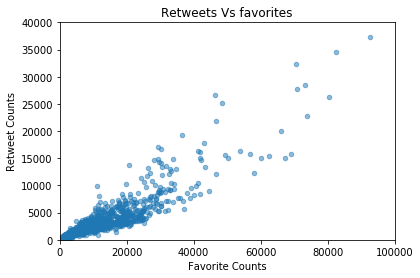

In [57]:

plt.figure(figsize=(10, 15))
we_rate_dogs_master_df.plot(kind = 'scatter', x = 'favorite_count', y = 'retweet_count', alpha = 0.5)
plt.xlim((0,100000))
plt.ylim((0,40000))
plt.xlabel('Favorite Counts')
plt.ylabel('Retweet Counts')
plt.title('Retweets Vs favorites');

They are related in terms of retweets and rating 

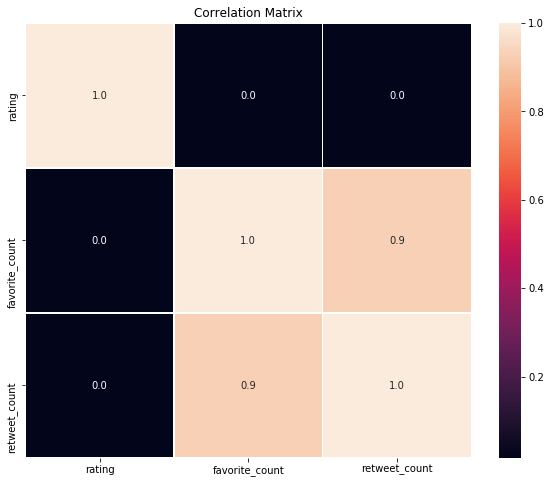

In [58]:
#i will be visualising the correlation for Ratings, Retweet and Favorite to check relationships
f,ax = plt.subplots(figsize=(10, 8))
sb.heatmap(we_rate_dogs_master_df[['rating', 'favorite_count', 'retweet_count']].corr(), annot=True, linewidths=.5, fmt= '.1f')
plt.title('Correlation Matrix');

There is a strong positive correlation between Favorite Counts and Retweet Counts

###  2.  Whats are the most popular dogs tweeted about 

Text(0.5,1,'Popular Dog Breeds')

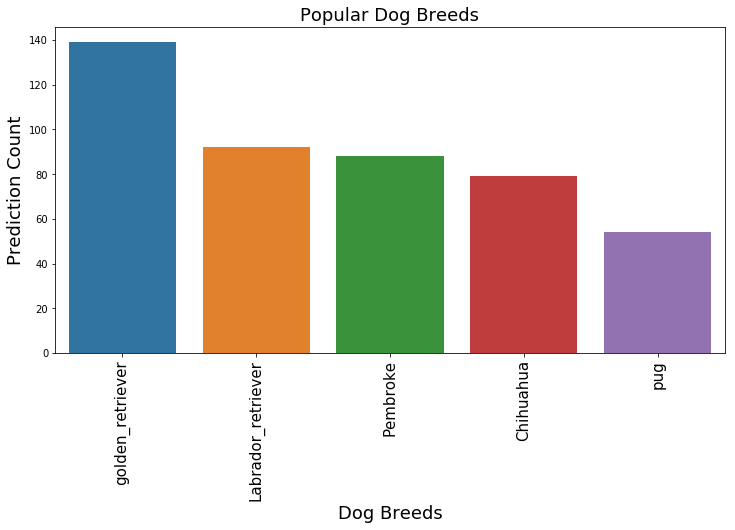

In [78]:
#Plot
plt.figure(figsize = (12,6))
ax = sb.barplot(x = we_rate_dogs_master_df['first_prediction'].value_counts()[0:5].index,
            y =we_rate_dogs_master_df['first_prediction'].value_counts()[0:5],
            data = we_rate_dogs_master_df);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 15);

#Labeling the plot
plt.xlabel("Dog Breeds",fontsize = 18);
plt.ylabel("Prediction Count",fontsize = 18);
plt.title("Popular Dog Breeds",fontsize = 18)

**golden_retriever**  is the most popular dog tweeted about followed by **labrador_retriever** and **pembroke**

### Whats are the most popular stages of Dogs 

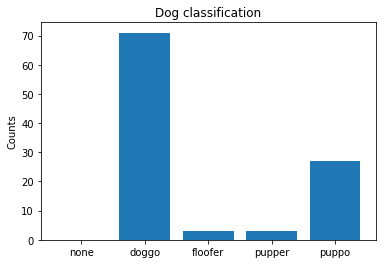

In [84]:
doggo_list= ['none','doggo', 'floofer', 'pupper', 'puppo']
counts = [we_rate_dogs_master_df.query('stage == "none"').count()[0],we_rate_dogs_master_df.query('stage == "doggo"').count()[0], we_rate_dogs_master_df.query('stage == "floofer"').count()[0],
          we_rate_dogs_master_df.query('stage == "floofer"').count()[0], we_rate_dogs_master_df.query('stage == "puppo"').count()[0]]
ind = np.arange(1, 6)
fig, ax = plt.subplots();
plt.bar(ind, counts);
ax.set_xticks(ind);
ax.set_xticklabels(doggo_list);
ax.set_ylabel('Counts');
ax.set_title('Dog classification');

**Doggo** is the most popular stage of Dog

## Summary of Insight

#### There is a very strong relation between **retweet_count** and **favorite_count**

#### The **golden_retriever** is the most popular dog tweeted about followed.

#### **doggo** is the most popular stage of dog.